# Lung Cancer Data Analysis Project

This notebook outlines the end-to-end data analysis pipeline for studying lung cancer data, covering data cleaning, exploratory analysis, statistical modeling, and recommendations.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"E:\General\Lung_Cancer_Trends_Realistic.csv")

In [3]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Years_Smoking,Cigarettes_Per_Day,Secondhand_Smoke_Exposure,Occupation_Exposure,Air_Pollution_Level,Family_History,...,Diet_Quality,Region,Income_Level,Education_Level,Access_to_Healthcare,Screening_Frequency,Chronic_Lung_Disease,Lung_Cancer_Stage,Diagnosis_Year,Survival_Status
0,P100000,76,Female,Never,6,37,Low,Diesel Fumes,Low,Yes,...,Poor,West,Middle,Tertiary,Good,Regularly,No,Stage II,2008,Alive
1,P100001,39,Male,Never,30,39,Low,Silica,Low,Yes,...,Average,North,Middle,Primary,Poor,Occasionally,Yes,NaN,2002,Alive
2,P100002,85,Male,Former,47,14,High,Asbestos,Low,Yes,...,Good,South,High,Tertiary,Average,Regularly,No,Stage II,2007,Deceased
3,P100003,45,Female,Current,45,32,Medium,Silica,High,No,...,Good,West,Low,Secondary,Average,Never,Yes,NaN,2011,Alive
4,P100004,48,Female,Never,46,26,Medium,Silica,Low,No,...,Good,North,Low,Tertiary,Average,Regularly,No,NaN,2016,Alive


In [4]:
df.isnull().sum()

Patient_ID                      0
Age                             0
Gender                          0
Smoking_Status                  0
Years_Smoking                   0
Cigarettes_Per_Day              0
Secondhand_Smoke_Exposure       0
Occupation_Exposure           744
Air_Pollution_Level             0
Family_History                  0
Genetic_Markers_Positive        0
BMI                             0
Physical_Activity_Level         0
Alcohol_Consumption           975
Diet_Quality                    0
Region                          0
Income_Level                    0
Education_Level                 0
Access_to_Healthcare            0
Screening_Frequency             0
Chronic_Lung_Disease            0
Lung_Cancer_Stage            2402
Diagnosis_Year                  0
Survival_Status                 0
dtype: int64

In [5]:
df.shape

(3000, 24)

In [6]:
df.dtypes

Patient_ID                    object
Age                            int64
Gender                        object
Smoking_Status                object
Years_Smoking                  int64
Cigarettes_Per_Day             int64
Secondhand_Smoke_Exposure     object
Occupation_Exposure           object
Air_Pollution_Level           object
Family_History                object
Genetic_Markers_Positive      object
BMI                          float64
Physical_Activity_Level       object
Alcohol_Consumption           object
Diet_Quality                  object
Region                        object
Income_Level                  object
Education_Level               object
Access_to_Healthcare          object
Screening_Frequency           object
Chronic_Lung_Disease          object
Lung_Cancer_Stage             object
Diagnosis_Year                 int64
Survival_Status               object
dtype: object

In [8]:
cols_with_nan_as_none = ['Lung_Cancer_Stage', 'Occupation_Exposure','Alcohol_Consumption']
df[cols_with_nan_as_none] = df[cols_with_nan_as_none].fillna('None')

In [9]:
df.isnull().sum()

Patient_ID                   0
Age                          0
Gender                       0
Smoking_Status               0
Years_Smoking                0
Cigarettes_Per_Day           0
Secondhand_Smoke_Exposure    0
Occupation_Exposure          0
Air_Pollution_Level          0
Family_History               0
Genetic_Markers_Positive     0
BMI                          0
Physical_Activity_Level      0
Alcohol_Consumption          0
Diet_Quality                 0
Region                       0
Income_Level                 0
Education_Level              0
Access_to_Healthcare         0
Screening_Frequency          0
Chronic_Lung_Disease         0
Lung_Cancer_Stage            0
Diagnosis_Year               0
Survival_Status              0
dtype: int64

In [10]:
df.head()

,Patient_ID,Age,Gender,Smoking_Status,Years_Smoking,Cigarettes_Per_Day,Secondhand_Smoke_Exposure,Occupation_Exposure,Air_Pollution_Level,Family_History,...,Diet_Quality,Region,Income_Level,Education_Level,Access_to_Healthcare,Screening_Frequency,Chronic_Lung_Disease,Lung_Cancer_Stage,Diagnosis_Year,Survival_Status
0,P100000,76,Female,Never,6,37,Low,Diesel Fumes,Low,Yes,...,Poor,West,Middle,Tertiary,Good,Regularly,No,Stage II,2008,Alive
1,P100001,39,Male,Never,30,39,Low,Silica,Low,Yes,...,Average,North,Middle,Primary,Poor,Occasionally,Yes,None,2002,Alive
2,P100002,85,Male,Former,47,14,High,Asbestos,Low,Yes,...,Good,South,High,Tertiary,Average,Regularly,No,Stage II,2007,Deceased
3,P100003,45,Female,Current,45,32,Medium,Silica,High,No,...,Good,West,Low,Secondary,Average,Never,Yes,None,2011,Alive
4,P100004,48,Female,Never,46,26,Medium,Silica,Low,No,...,Good,North,Low,Tertiary,Average,Regularly,No,None,2016,Alive


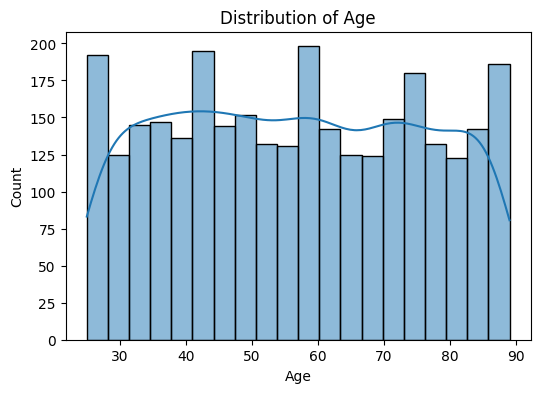

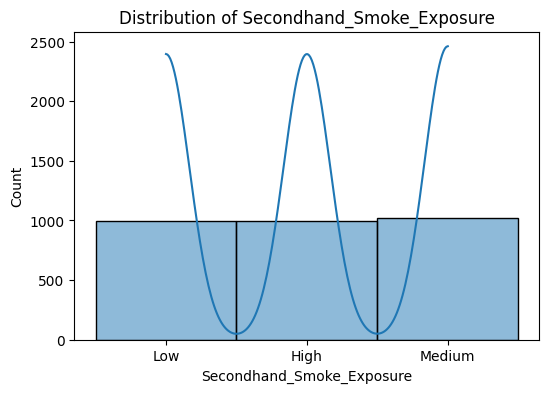

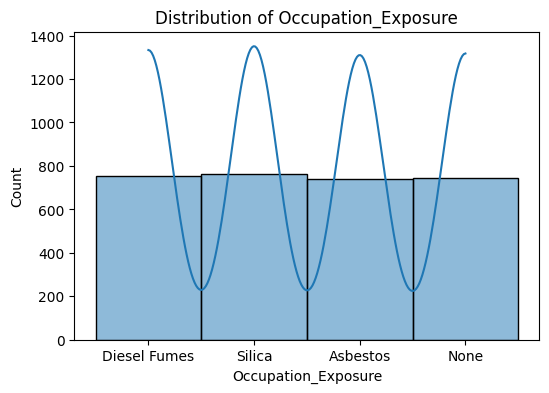

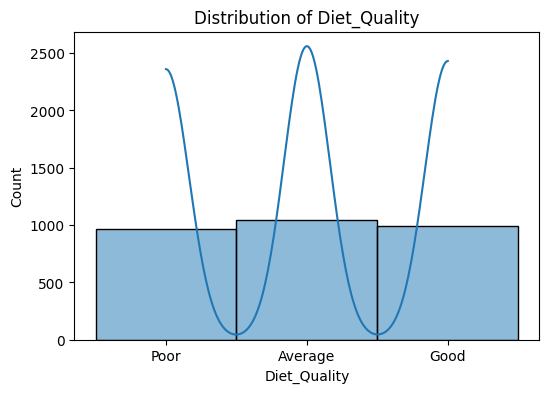

In [14]:
cols = ['Age', 'Secondhand_Smoke_Exposure', 'Occupation_Exposure', 'Diet_Quality']

for col in cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=col, bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

In [18]:
df[['Age', 'Cigarettes_Per_Day']].describe()


,Age,Cigarettes_Per_Day
count,3000.000000,3000.000000
mean,56.654333,19.624000
std,18.740880,11.430289
min,25.000000,0.000000
25%,41.000000,10.000000
50%,57.000000,19.000000
75%,73.000000,29.000000
max,89.000000,39.000000


In [20]:
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.drop('Patient_ID')

for col in categorical_cols:
    print(f"Class distribution for '{col}':\n")
    print(df[col].value_counts())
    print("\n")


Class distribution for 'Gender':

Gender
Male      1506
Female    1494
Name: count, dtype: int64


Class distribution for 'Smoking_Status':

Smoking_Status
Current    1153
Former      935
Never       912
Name: count, dtype: int64


Class distribution for 'Secondhand_Smoke_Exposure':

Secondhand_Smoke_Exposure
Medium    1018
Low        991
High       991
Name: count, dtype: int64


Class distribution for 'Occupation_Exposure':

Occupation_Exposure
Silica          763
Diesel Fumes    753
None            744
Asbestos        740
Name: count, dtype: int64


Class distribution for 'Air_Pollution_Level':

Air_Pollution_Level
Moderate    1038
High         990
Low          972
Name: count, dtype: int64


Class distribution for 'Family_History':

Family_History
Yes    1500
No     1500
Name: count, dtype: int64


Class distribution for 'Genetic_Markers_Positive':

Genetic_Markers_Positive
No     2718
Yes     282
Name: count, dtype: int64


Class distribution for 'Physical_Activity_Level':

Physic

Smoking_Status vs Lung_Cancer_Stage
Occupation_Exposure vs Survival_Status

In [27]:
# Group by Smoking_Status and count occurrences of Lung_Cancer_Stage
stat = df.groupby(["Smoking_Status", "Lung_Cancer_Stage"]).size().reset_index(name="Count")
stat

,Smoking_Status,Lung_Cancer_Stage,Count
0,Current,None,924
1,Current,Stage I,59
2,Current,Stage II,59
3,Current,Stage III,52
4,Current,Stage IV,59
5,Former,None,751
6,Former,Stage I,56
7,Former,Stage II,42
8,Former,Stage III,42
9,Former,Stage IV,44
